In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib_venn
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

In [2]:
tab10 = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF"]
pastel1 = ["#FBB4AE", "#B3CDE3", "#CCEBC5", "#DECBE4", "#FED9A6", "#FFFFCC", "#E5D8BD", "#FDDAEC", "#F2F2F2"]
set3 = ["#8DD3C7", "#FFFFB3", "#BEBADA", "#FB8072", "#80B1D3", "#FDB462", "#B3DE69", "#FCCDE5", "#D9D9D9", "#BC80BD", "#CCEBC5", "#FFED6F"]

<br><br><br><hr><br><br><br>

In [3]:
base_dir = "/home/ph/data/temporary/for_katia_akshaya/"
fig_dir = base_dir + "GSM3722057/"
name = "GSM3722057"

In [4]:
with open("{}GSM3722057_karyotypes.pickle".format(base_dir), "rb") as fh:
    karyotype_per_barcode = pickle.load(fh)
    
# karyotype_per_barcode

In [5]:
tmp_dict = {
    "1.1": "0",
    "1.2": "1",
    "1.3": "2",
    "2.1": "3",
    "2.2": "4",
    "3.1": "5",
    "3.2": "6",
    "3.3": "7",
    "3.4": "8"
}
karyotype_per_barcode = {k: tmp_dict[v] for k, v in karyotype_per_barcode.items()}

In [6]:
with open("{}GSM3722057_clusters.pickle".format(base_dir), "rb") as fh:
    cluster_per_barcode = pickle.load(fh)
    
# cluster_per_barcode

In [7]:
cluster_per_barcode = {k: "0" if v == "Tumor" else "1" if v == "Fibroblasts" else "2" if v == "Unknown" else "x" for k, v in cluster_per_barcode.items()}

In [8]:
list_of_barcodes = pd.read_csv("{}SU006_Pre_final_cluster_order.csv".format(base_dir))
list_of_barcodes["bc"] = [bc.replace("cell-", "") for bc in list_of_barcodes.x]
list_of_barcodes

,x,bc
0,cell-AAATGCCAGCTGAATA-1,AAATGCCAGCTGAATA-1
1,cell-TGTAAGCTCAGGAAGC-1,TGTAAGCTCAGGAAGC-1
2,cell-TGGGTGCCATTTAGGC-1,TGGGTGCCATTTAGGC-1
3,cell-ACATGCAGTGCAAGCA-1,ACATGCAGTGCAAGCA-1
4,cell-ACAAAGACAAGAAACT-1,ACAAAGACAAGAAACT-1
...,...,...
2035,cell-TATGTGGGTCAGAGTG-1,TATGTGGGTCAGAGTG-1
2036,cell-AGTCAACTCCCACTTG-1,AGTCAACTCCCACTTG-1
2037,cell-CGTGGCAAGTAACTCC-1,CGTGGCAAGTAACTCC-1
2038,cell-AACGTACGTGAGGGTT-1,AACGTACGTGAGGGTT-1


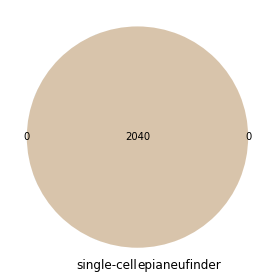

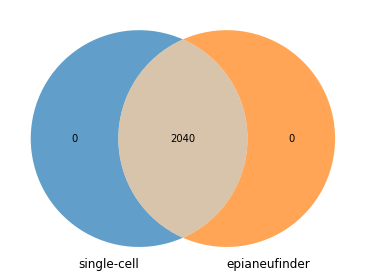

In [9]:
n_both = len(set(cluster_per_barcode.keys()).intersection(set(list_of_barcodes.bc)))
n_sc = len(set(cluster_per_barcode.keys()).difference(set(list_of_barcodes.bc)))
n_karyo = len(set(list_of_barcodes.bc).difference(set(cluster_per_barcode.keys())))

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=True)
matplotlib_venn.venn2(subsets=(n_sc, n_karyo, n_both), set_labels=("single-cell", "epianeufinder"), set_colors=("tab:blue", "tab:orange"), alpha=0.7, ax=ax)
plt.tight_layout()
plt.savefig(fig_dir + "venn_{}.png".format(name), dpi=300)
# plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=True)
matplotlib_venn.venn2_unweighted(subsets=(n_sc, n_karyo, n_both), set_labels=("single-cell", "epianeufinder"), set_colors=("tab:blue", "tab:orange"), alpha=0.7, ax=ax)
plt.tight_layout()
plt.savefig(fig_dir + "venn_{}_unweighted.png".format(name), dpi=300)
# plt.show()

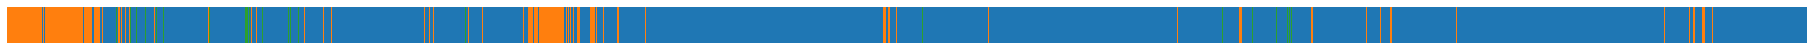

In [10]:
# na_val = np.max([int(x) for x in cluster_per_barcode.values()]) + 1
# cluster_anno = [int(cluster_per_barcode[bc]) if bc in cluster_per_barcode else na_val for bc in list_of_barcodes.bc]
cluster_anno = [int(cluster_per_barcode[bc]) if bc in cluster_per_barcode else na_val for bc in list_of_barcodes.bc]
# print(cluster_anno)

fig = plt.figure(figsize=(25, 0.5))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

col = PatchCollection([
    Rectangle((i, 0), 1, 1)
    for i in range(len(cluster_anno))
])

# col.set_array(cluster_anno)
# col.set_cmap(plt.cm.tab10)
col.set_color([tab10[i] for i in cluster_anno])
# col.set_facecolor([tab10[i] for i in cluster_anno])
# col.set_edgecolor([tab10[i] for i in cluster_anno])
ax.add_collection(col)

ax.set_ylim(0, 1)
ax.set_xlim(0, len(cluster_anno))

plt.savefig("{}{}_color_bar.jpg".format(fig_dir, name))
# plt.show()

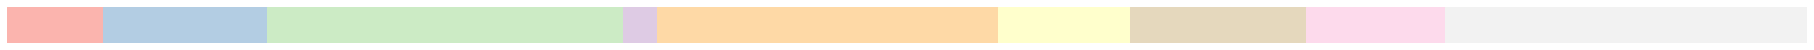

In [11]:
na_val = np.max([int(x) for x in karyotype_per_barcode.values()]) + 1
cluster_anno = [int(karyotype_per_barcode[bc]) if bc in karyotype_per_barcode else na_val for bc in list_of_barcodes.bc]
# print(cluster_anno)

fig = plt.figure(figsize=(25, 0.5))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

col = PatchCollection([
    Rectangle((i, 0), 1, 1)
    for i in range(len(cluster_anno))
])

# col.set_array(cluster_anno)
# col.set_cmap(plt.cm.tab10)
col.set_color([pastel1[i] for i in cluster_anno])
# col.set_facecolor([tab10[i] for i in cluster_anno])
# col.set_edgecolor([tab10[i] for i in cluster_anno])
ax.add_collection(col)

ax.set_ylim(0, 1)
ax.set_xlim(0, len(cluster_anno))

plt.savefig("{}{}_color_bar_karyotype_pastel1.jpg".format(fig_dir, name))
# plt.show()

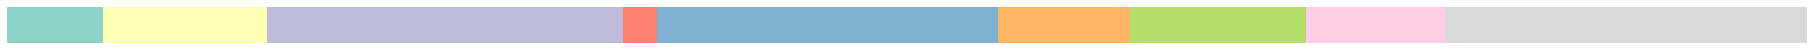

In [12]:
na_val = np.max([int(x) for x in karyotype_per_barcode.values()]) + 1
cluster_anno = [int(karyotype_per_barcode[bc]) if bc in karyotype_per_barcode else na_val for bc in list_of_barcodes.bc]
# print(cluster_anno)

fig = plt.figure(figsize=(25, 0.5))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

col = PatchCollection([
    Rectangle((i, 0), 1, 1)
    for i in range(len(cluster_anno))
])

# col.set_array(cluster_anno)
# col.set_cmap(plt.cm.tab10)
col.set_color([set3[i] for i in cluster_anno])
# col.set_facecolor([tab10[i] for i in cluster_anno])
# col.set_edgecolor([tab10[i] for i in cluster_anno])
ax.add_collection(col)

ax.set_ylim(0, 1)
ax.set_xlim(0, len(cluster_anno))

plt.savefig("{}{}_color_bar_karyotype_set3.jpg".format(fig_dir, name))
# plt.show()

<br><br><br><hr><br><br><br>

In [13]:
base_dir = "/home/ph/data/temporary/for_katia_akshaya/"
fig_dir = base_dir + "GSM3722064/"
name = "GSM3722064"

In [14]:
# list_of_barcodes = pd.read_csv("{}SU008_Pre_Final_min5_cluster_order.csv".format(base_dir))
list_of_barcodes = pd.read_csv("{}SU008_Pre_final_cluster_order.csv".format(base_dir))
list_of_barcodes["bc"] = [bc.replace("cell-", "") for bc in list_of_barcodes.x]
list_of_barcodes

,x,bc
0,cell-AAAGATGTCTTCGTTA-1,AAAGATGTCTTCGTTA-1
1,cell-CCAATGATCGGTCTAA-1,CCAATGATCGGTCTAA-1
2,cell-CCCGTTAAGTTCAACC-1,CCCGTTAAGTTCAACC-1
3,cell-GTGCACGTCTTTGCAT-1,GTGCACGTCTTTGCAT-1
4,cell-TTCGCGTTCGCCTTAC-1,TTCGCGTTCGCCTTAC-1
...,...,...
499,cell-GCCATAACACCTGTGG-1,GCCATAACACCTGTGG-1
500,cell-GACCCAGAGGATGCCA-1,GACCCAGAGGATGCCA-1
501,cell-GAAGTCTTCGGGAAAC-1,GAAGTCTTCGGGAAAC-1
502,cell-AGTTTGGGTGGCCTCA-1,AGTTTGGGTGGCCTCA-1


In [15]:
with open("{}GSM3722064_bins.pickle".format(base_dir), "rb") as fh:
    bin_per_barcode = pickle.load(fh)
    
# bin_per_barcode

In [16]:
with open("{}GSM3722064_karyotypes.pickle".format(base_dir), "rb") as fh:
    karyotype_per_barcode = pickle.load(fh)
    
# karyotype_per_barcode

In [17]:
tmp_dict = {
    "1.1": "0",
    "1.2": "1",
    "1.3": "2",
    "2": "3",
    "3.1": "4",
    "3.2": "5",
    "3.3.1": "6",
    "3.3.2": "7",
    "3.3.3": "8"
}
karyotype_per_barcode = {k: tmp_dict[v] for k, v in karyotype_per_barcode.items()}

In [18]:
with open("{}GSM3722064_clusters.pickle".format(base_dir), "rb") as fh:
    cluster_per_barcode = pickle.load(fh)
    
# cluster_per_barcode

In [19]:
cluster_per_barcode = {k: "0" if v == "Tumor" else "1" if v == "Fibroblasts" else "2" if v == "Unknown" else "3" if v == "Endothelial" else "x" for k, v in cluster_per_barcode.items()}

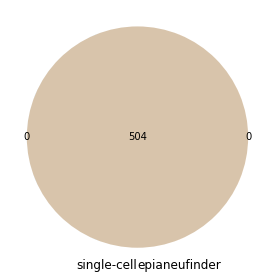

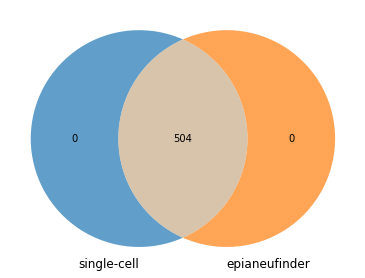

In [20]:
n_both = len(set(cluster_per_barcode.keys()).intersection(set(list_of_barcodes.bc)))
n_sc = len(set(cluster_per_barcode.keys()).difference(set(list_of_barcodes.bc)))
n_karyo = len(set(list_of_barcodes.bc).difference(set(cluster_per_barcode.keys())))

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=True)
matplotlib_venn.venn2(subsets=(n_sc, n_karyo, n_both), set_labels=("single-cell", "epianeufinder"), set_colors=("tab:blue", "tab:orange"), alpha=0.7, ax=ax)
plt.tight_layout()
plt.savefig(fig_dir + "venn_{}.png".format(name), dpi=300)
# plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=True)
matplotlib_venn.venn2_unweighted(subsets=(n_sc, n_karyo, n_both), set_labels=("single-cell", "epianeufinder"), set_colors=("tab:blue", "tab:orange"), alpha=0.7, ax=ax)
plt.tight_layout()
plt.savefig(fig_dir + "venn_{}_unweighted.png".format(name), dpi=300)
# plt.show()

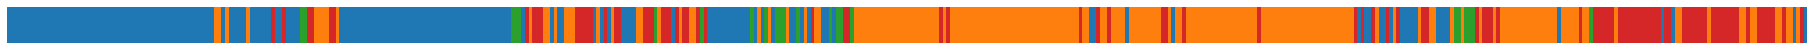

In [21]:
na_val = np.max([int(x) for x in cluster_per_barcode.values()]) + 1
cluster_anno = [int(cluster_per_barcode[bc]) if bc in cluster_per_barcode else na_val for bc in list_of_barcodes.bc]
# print(cluster_anno)

fig = plt.figure(figsize=(25, 0.5))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

col = PatchCollection([
    Rectangle((i, 0), 1, 1)
    for i in range(len(cluster_anno))
])

# col.set_array(cluster_anno)
# col.set_cmap(plt.cm.tab10)
col.set_color([tab10[i] for i in cluster_anno])
# col.set_facecolor([tab10[i] for i in cluster_anno])
# col.set_edgecolor([tab10[i] for i in cluster_anno])
ax.add_collection(col)

ax.set_ylim(0, 1)
ax.set_xlim(0, len(cluster_anno))

plt.savefig("{}{}_color_bar.jpg".format(fig_dir, name))
# plt.show()

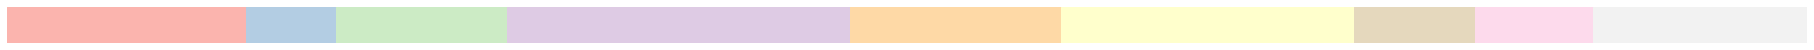

In [22]:
na_val = np.max([int(x) for x in karyotype_per_barcode.values()]) + 1
cluster_anno = [int(karyotype_per_barcode[bc]) if bc in karyotype_per_barcode else na_val for bc in list_of_barcodes.bc]
# print(cluster_anno)

fig = plt.figure(figsize=(25, 0.5))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

col = PatchCollection([
    Rectangle((i, 0), 1, 1)
    for i in range(len(cluster_anno))
])

# col.set_array(cluster_anno)
# col.set_cmap(plt.cm.tab10)
col.set_color([pastel1[i] for i in cluster_anno])
# col.set_facecolor([tab10[i] for i in cluster_anno])
# col.set_edgecolor([tab10[i] for i in cluster_anno])
ax.add_collection(col)

ax.set_ylim(0, 1)
ax.set_xlim(0, len(cluster_anno))

plt.savefig("{}{}_color_bar_karyotype_pastel1.jpg".format(fig_dir, name))
# plt.show()

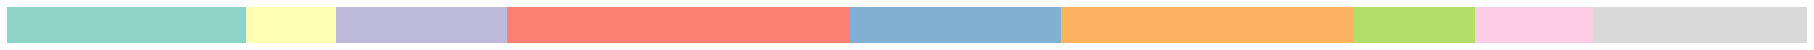

In [23]:
na_val = np.max([int(x) for x in karyotype_per_barcode.values()]) + 1
cluster_anno = [int(karyotype_per_barcode[bc]) if bc in karyotype_per_barcode else na_val for bc in list_of_barcodes.bc]
# print(cluster_anno)

fig = plt.figure(figsize=(25, 0.5))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

col = PatchCollection([
    Rectangle((i, 0), 1, 1)
    for i in range(len(cluster_anno))
])

# col.set_array(cluster_anno)
# col.set_cmap(plt.cm.tab10)
col.set_color([set3[i] for i in cluster_anno])
# col.set_facecolor([tab10[i] for i in cluster_anno])
# col.set_edgecolor([tab10[i] for i in cluster_anno])
ax.add_collection(col)

ax.set_ylim(0, 1)
ax.set_xlim(0, len(cluster_anno))

plt.savefig("{}{}_color_bar_karyotype_set3.jpg".format(fig_dir, name))
# plt.show()

In [47]:
n_bins = 10
end_index = list_of_barcodes.shape[0]

bin_size = np.ceil(end_index / n_bins)

[end_index - bin_size * (n_bins - 1)]

bins = []
for i in range(n_bins):
    reps = end_index - bin_size * (n_bins - 1) if i == n_bins - 1 else bin_size
    for _ in range(int(reps)):
        bins.append(i)

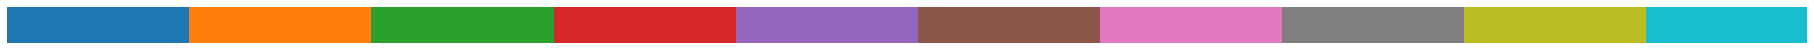

In [48]:
fig = plt.figure(figsize=(25, 0.5))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

col = PatchCollection([
    Rectangle((i, 0), 1, 1)
    for i in range(len(bins))
])

# col.set_array(cluster_anno)
# col.set_cmap(plt.cm.tab10)
col.set_color([tab10[i] for i in bins])
# col.set_facecolor([tab10[i] for i in cluster_anno])
# col.set_edgecolor([tab10[i] for i in cluster_anno])
ax.add_collection(col)

ax.set_ylim(0, 1)
ax.set_xlim(0, len(bins))

plt.savefig("{}{}_color_bar_bins.jpg".format(fig_dir, name))
# plt.show()

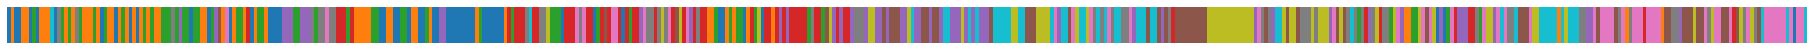

In [63]:
na_val = np.max([int(x) for x in bin_per_barcode.values()]) + 1
bin_anno = [int(bin_per_barcode[bc]) if bc in bin_per_barcode else na_val for bc in list_of_barcodes.bc]
# print(cluster_anno)

fig = plt.figure(figsize=(25, 0.5))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

col = PatchCollection([
    Rectangle((i, 0), 1, 1)
    for i in range(len(bin_anno))
])

# col.set_array(cluster_anno)
# col.set_cmap(plt.cm.tab10)
col.set_color([tab10[i] for i in bin_anno])
# col.set_facecolor([tab10[i] for i in cluster_anno])
# col.set_edgecolor([tab10[i] for i in cluster_anno])
ax.add_collection(col)

ax.set_ylim(0, 1)
ax.set_xlim(0, len(bin_anno))

plt.savefig("{}{}_color_bar_bins_transferred.jpg".format(fig_dir, name))
# plt.show()